In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('healthcare_deliverable1.csv')  # or .xlsx, .json

# Display the first five rows of the dataset to get a quick overview of the data
df.head()

# Show the structure of the DataFrame, including column names, non-null counts, and data types
df.info()

# Generate summary statistics (count, mean, std, min, max, quartiles) for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


✅ Handling Missing Values: Age Column
In this step, we address missing values in the Age column. Missing ages are replaced with the median value of the column. This method is chosen because the median is less sensitive to outliers and helps retain the central tendency of the data without distortion.

In [22]:
# Display the number of missing values in each column
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [21]:
# Performing cleaning tasks - Handle Missing Values:

# Step 1: Check missing values before filling
print("Missing values before filling:")
print(df['Age'].isnull().sum())

# Replace missing values in 'Age' column with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Step 3: Check missing values after filling
print("Missing values after filling:")
print(df['Age'].isnull().sum())



Missing values before filling:
0
Missing values after filling:
0


✅ Step: Removing Duplicate Records
To ensure data integrity and prevent bias in analysis, duplicate rows were removed using the drop_duplicates() method. This helps guarantee that each entry in the dataset represents a unique case or observation.

In [ ]:
# Step: Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)
### Removing Duplicates - Duplicate records were removed using `drop_duplicates()` to ensure each row represents a unique patient case.



✅ Step: Fixing Inconsistencies in the 'Gender' Column
To clean and standardize the 'Gender' column, leading/trailing whitespaces were removed and all values were converted to lowercase using .str.strip().str.lower(). Common variations such as 'male', 'm', 'female', and 'f' were then mapped to consistent labels 'Male' and 'Female'. This ensures uniformity and reduces noise in the categorical data.

In [8]:
# Fix Inconsistencies or Noisy Data

# Step: Clean and standardize values in the 'Gender' column
df['Gender'] = df['Gender'].str.strip().str.lower()  # Remove spaces and lowercase
df['Gender'] = df['Gender'].replace({'male': 'Male', 'm': 'Male', 'female': 'Female', 'f': 'Female'})


✅ Step: Removing Whitespace from All String Columns
To further clean the dataset, all leading and trailing whitespace characters were removed from every column containing string data. This was achieved by applying the .str.strip() method across all object-type columns using a lambda function. This step helps prevent errors caused by inconsistent spacing in categorical data.

In [9]:
# Step: Strip whitespace characters from all string-type columns
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)


📊 Step: Visualizing Age Distribution with Histogram
A histogram was created using Seaborn’s histplot() function to visualize the distribution of the 'Age' variable in the dataset. This helps to understand the frequency and spread of different age groups among the patients.

Text(0.5, 1.0, 'Age Distribution')

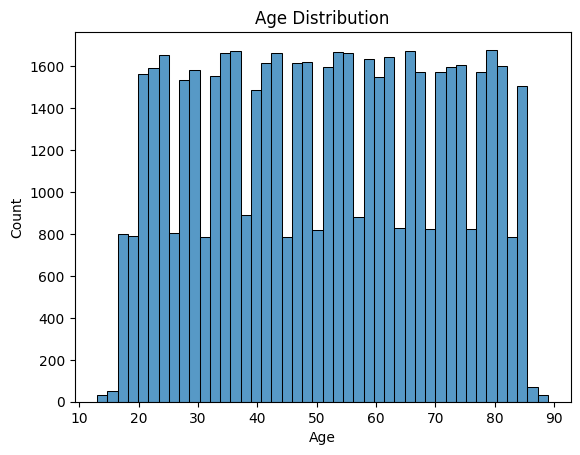

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.title('Age Distribution')


Data Distributions:

✅ Step: Display Dataset Column Names
The print(df.columns) command lists all column names in the DataFrame, helping to quickly identify available attributes for analysis and manipulation.

In [15]:
print(df.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


Step: Boxplot for Billing Amount
This code creates a boxplot for the 'Billing Amount' column to visualize the distribution, central tendency, and detect any potential outliers in the billing data. Boxplots help in understanding data spread and spotting anomalies.

<Axes: xlabel='Billing Amount'>

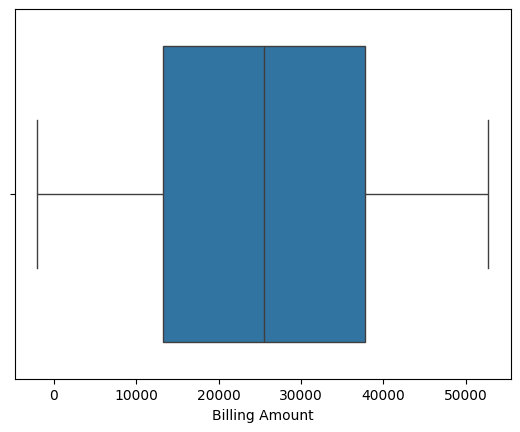

In [16]:
sns.boxplot(x=df['Billing Amount'])


Boxplots (to find outliers)

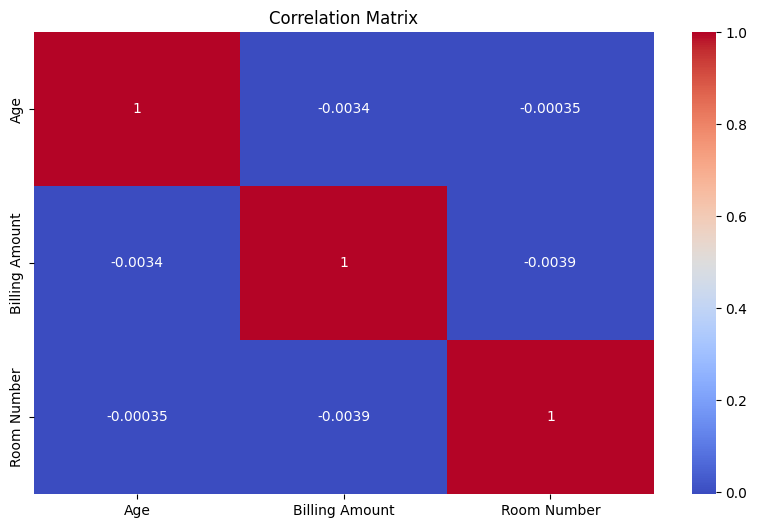

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Pairplots / Heatmaps for Relationships:

In [1]:
print('hello')

hello
